# number of sessions for each pair of region
In this notebook we try to find for each pair of intrest how many sessions are available on IBL datasets

In [1]:
import pandas
import submitit
from brainbox.io.spikeglx import Streamer
from one.api import ONE
import pandas as pd
import numpy as np
import os
import json
from brainbox.io.one import load_channel_locations
from iblatlas.atlas import AllenAtlas
from iblatlas.regions import BrainRegions
from pprint import pprint  
from one.api import ONE
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')
ba = AllenAtlas
br = BrainRegions() # br is also an attribute of ba so could to br = ba.regions

## mice visual areas with allen atlas acronym 
1. primary visual area (VISp) (V1) 
2. posteromedial visual area (VISpm) (PM)
3. Anteromedial visual area (VISam) (AM)
4. Anterior visual area (VISa) (A)
5. Rostrolateral visual area (VISrl) (RL)
6. Anterolateral visual area (VISal)(AL)
7. Laterointermediate visual area (VISli) (LI)
8. lateral visual area (VISl) (LM)
   
**for a review of role of these areas in visual processing look at "ibl-oscillations/paper_review/roles_of_mice_visual_areas.qmd"**

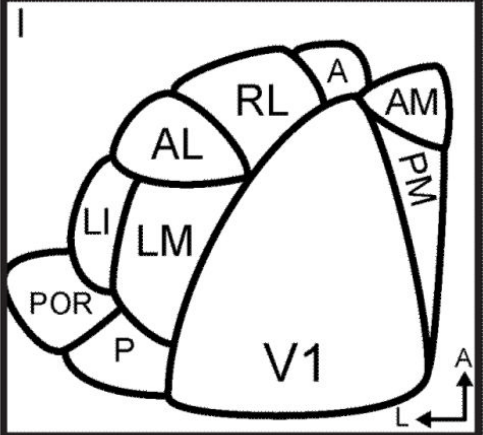

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Original region names and acronyms
region = ['VISp', 'VISpm', 'VISam', 'VISa', 'VISrl', 'VISal', 'VISli', 'VISl']
acronyms = ['V1', 'PM', 'AM', 'A', 'RL', 'AL', 'LI', 'LM']

# Create a mapping dictionary from region names to acronyms
region_to_acronym = dict(zip(region, acronyms))

paired_regions = [(region[i], region[j]) for i in range(len(region)) for j in range(i, len(region))]

def find_shared_eids(atlas_acronym):
    # Initialize an empty DataFrame with float type to store the shared eids count
    shared_eids_matrix = pd.DataFrame(0.0, index=region, columns=region)
    
    for pair in atlas_acronym:
        # Retrieve eids for each Allen ID in the pair
        sessions_list_1 = one.alyx.rest('sessions', 'list', task_protocol='ephys', performance_gte=70, dataset_qc_gte='PASS', dataset='*lf*', atlas_acronym=pair[0])
        eids_1 = [session['id'] for session in sessions_list_1]

        sessions_list_2 = one.alyx.rest('sessions', 'list', task_protocol='ephys', performance_gte=70, dataset_qc_gte='PASS', dataset='*lf*', atlas_acronym=pair[1])
        eids_2 = [session['id'] for session in sessions_list_2]

        # Find the intersection (common eids)
        shared_eids = np.intersect1d(eids_1, eids_2)

        # Fill the matrix with the number of shared eids
        shared_eids_matrix.at[pair[0], pair[1]] = None
        shared_eids_matrix.at[pair[1], pair[0]] = len(shared_eids) 

    # Set the diagonal to NaN to ignore self-pairs
    
    return shared_eids_matrix




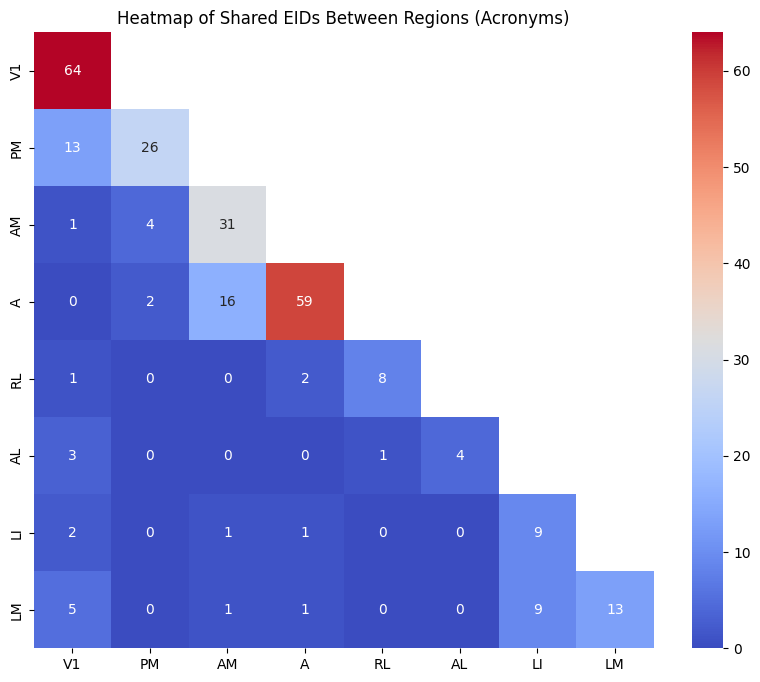

In [3]:
# Call the function to get the shared eids matrix
shared_eids_matrix = find_shared_eids(paired_regions)
#np.fill_diagonal(shared_eids_matrix.values, np.nan)

# Update the index and columns of the DataFrame to use acronyms instead of full region names
shared_eids_matrix.rename(index=region_to_acronym, columns=region_to_acronym, inplace=True)

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(shared_eids_matrix, annot=True, cmap='coolwarm', cbar=True, mask=shared_eids_matrix.isnull())
plt.title("Heatmap of Shared EIDs Between Regions (Acronyms)")
plt.show()


## non-visual areas that are involved in the task: 
1) secondary motor area: MOs
2) Posterior Parietal Cortex:  PTLp
3) Anterior cingulate area: ACA

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Original region names and acronyms
region = ['VISp', 'MOs', 'PTLp', 'ACA']


paired_regions = [(region[i], region[j]) for i in range(len(region)) for j in range(i, len(region))]

def find_shared_eids(atlas_acronym):
    # Initialize an empty DataFrame with float type to store the shared eids count
    shared_eids_matrix = pd.DataFrame(0.0, index=region, columns=region)
    
    for pair in atlas_acronym:
        # Retrieve eids for each Allen ID in the pair
        sessions_list_1 = one.alyx.rest('sessions', 'list', task_protocol='ephys', performance_gte=70, dataset_qc_gte='PASS', dataset='*lf*', atlas_acronym=pair[0])
        eids_1 = [session['id'] for session in sessions_list_1]

        sessions_list_2 = one.alyx.rest('sessions', 'list', task_protocol='ephys', performance_gte=70, dataset_qc_gte='PASS', dataset='*lf*', atlas_acronym=pair[1])
        eids_2 = [session['id'] for session in sessions_list_2]

        # Find the intersection (common eids)
        shared_eids = np.intersect1d(eids_1, eids_2)

        # Fill the matrix with the number of shared eids
        shared_eids_matrix.at[pair[0], pair[1]] = None
        shared_eids_matrix.at[pair[1], pair[0]] = len(shared_eids) 

    # Set the diagonal to NaN to ignore self-pairs
    
    return shared_eids_matrix


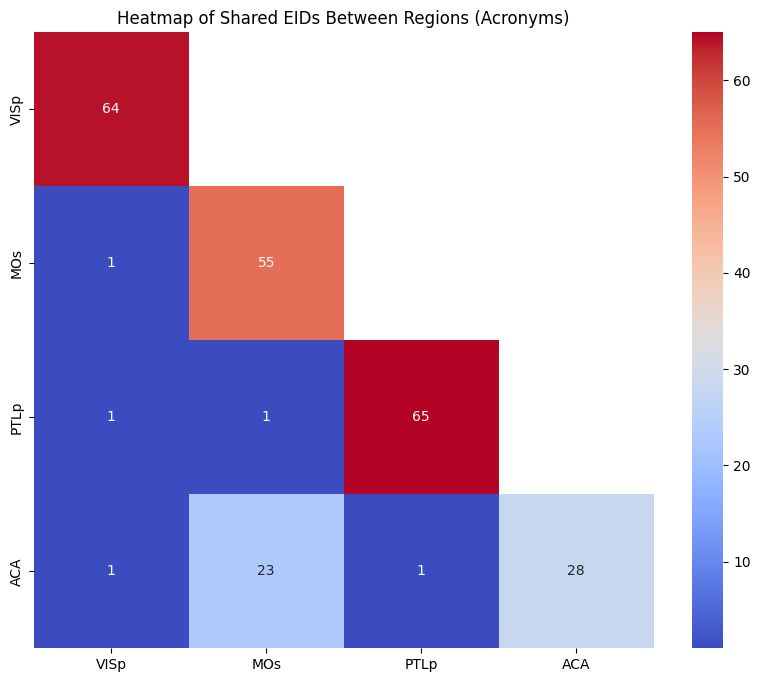

In [5]:
# Call the function to get the shared eids matrix
shared_eids_matrix = find_shared_eids(paired_regions)
#np.fill_diagonal(shared_eids_matrix.values, np.nan)


# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(shared_eids_matrix, annot=True, cmap='coolwarm', cbar=True, mask=shared_eids_matrix.isnull())
plt.title("Heatmap of Shared EIDs Between Regions (Acronyms)")
plt.show()
